In [ ]:
!export CUDA_VISIBLE_DEVICES=0
!export HF_HOME=/home/foresti/.chache/huggingface

from mutinfo.distributions.generative.generative_rv import GenerativeRV
from mutinfo.distributions.base import CorrelatedNormal

hf_path = "google/ncsnpp-celebahq-256"
hf_path = "FrankCCCCC/cfm-cifar10-32"

base_rv = CorrelatedNormal(1.0, 1)
gen_rv = GenerativeRV(base_rv, hf_path=hf_path, method='rk4', device='cuda', step_size=1e-3, eps=1e-3)
x, y = gen_rv.rvs(size=4)

/home/foresti/miniconda/envs/mutinfo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 2/2 [00:00<00:00, 42.62it/s]
/home/foresti/mutinfo/source/python/mutinfo/distributions/generative/ode_utils.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, device=device, dtype=torch.float32)


In [2]:
x.shape, y.shape

((4, 3, 32, 32), (4, 3, 32, 32))

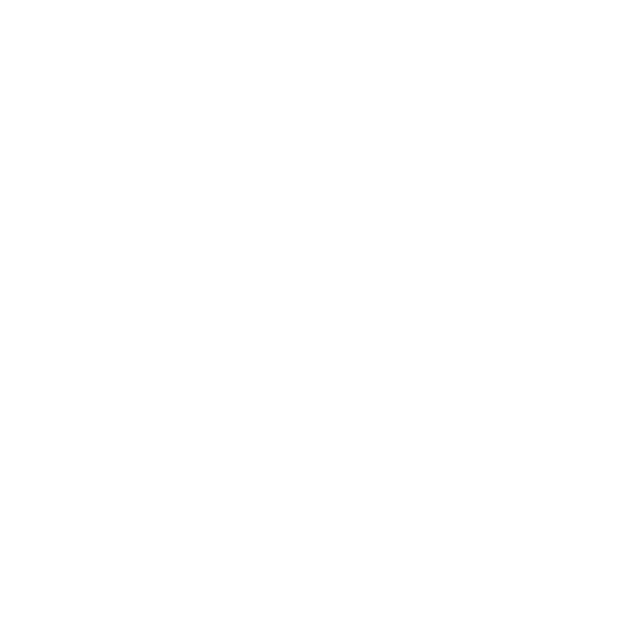

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def image_grid(x):
  size = 32
  channels = 3
  img = x.reshape(-1, size, size, channels)
  w = int(np.sqrt(img.shape[0]))
  img = img.reshape((w, w, size, size, channels)).transpose((0, 2, 1, 3, 4)).reshape((w * size, w * size, channels))
  return img

def show_samples(x):
  x = x.transpose(0, 2, 3, 1)
  img = image_grid(x)
  plt.figure(figsize=(8,8))
  plt.axis('off')
  plt.imshow(img)
  plt.show()

show_samples(x)

In [ ]:

from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("google/ddpm-cifar10-32")
model = pipe.unet

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]An error occurred while trying to fetch /homes/foresti/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80: Error no file named diffusion_pytorch_model.safetensors found in directory /homes/foresti/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|██████████| 2/2 [00:00<00:00, 21.95it/s]


In [ ]:
type(pipe)
pipe.scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.34.0",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_large"
}

In [ ]:
!export CUDA_VISIBLE_DEVICES=0
!export HF_HOME=/home/foresti/.chache/huggingface

from mutinfo.distributions.generative.generative_rv import GenerativeRV
from mutinfo.distributions.base import CorrelatedNormal, CorrelatedUniform
from mutinfo.distributions.generative.drifts import flow_make_moons

rv = CorrelatedNormal(0.8, 2, 2)

drift_function = flow_make_moons(rv, device='cuda')

ode_sampler_dict = {
    'drift_fn': drift_function,
    'inverse_scaler': lambda x: x,
    'shape': (2,),
}

# change structure of ode_sampler_dict to allow attribute access with dot notation

gen_rv = GenerativeRV(rv, ode_sampler_dict=ode_sampler_dict, method='rk4', device='cuda', step_size=1e-2, eps=1e-3)

Training flow make_moons model: 100%|██████████| 10000/10000 [00:16<00:00, 607.41it/s]


In [ ]:
!export CUDA_VISIBLE_DEVICES=0
from mutinfo.estimators.parametric.mine import MINE

x, y = gen_rv.rvs(size=10000)
mine = MINE(device="cuda")

mine(x,y)

ValueError: devices do not match: t0: cuda:0, y0: cuda:0, k1: cuda:0

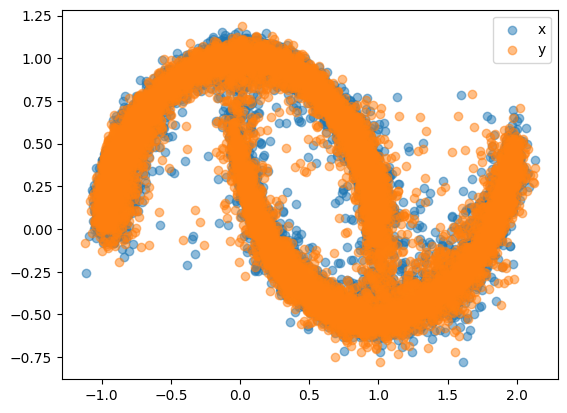

In [ ]:
from matplotlib import pyplot as plt

def visualize_x_and_y(x,y):
    plt.scatter(x[:, 0], x[:, 1], label='x', alpha=0.5)
    plt.scatter(y[:, 0], y[:, 1], label='y', alpha=0.5)
    plt.legend()
    plt.show()

mine = MINE(device="cuda:0")
# x,y = rv.rvs(size=10000)
visualize_x_and_y(x, y)

# mine(x,y)

In [ ]:
from diffusers import DDPMPipeline

pipeline = DDPMPipeline.from_pretrained("FrankCCCCC/cfm-cifar10-32")
pipeline

Loading pipeline components...: 100%|██████████| 2/2 [00:00<00:00, 43.42it/s]


DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "FrankCCCCC/cfm-cifar10-32",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

In [ ]:
pipeline.scheduler.timesteps

tensor([1000.0000,  999.0000,  998.0000,  997.0000,  996.0000,  995.0000,
         994.0000,  993.0000,  992.0000,  991.0000,  990.0000,  989.0000,
         988.0000,  987.0000,  986.0000,  985.0000,  984.0000,  983.0000,
         982.0000,  981.0000,  980.0000,  979.0000,  978.0000,  977.0000,
         976.0000,  975.0000,  974.0000,  973.0000,  972.0000,  971.0000,
         970.0000,  969.0000,  968.0000,  967.0000,  966.0000,  965.0000,
         964.0000,  963.0000,  962.0000,  961.0000,  960.0000,  959.0000,
         958.0000,  957.0000,  956.0000,  955.0000,  954.0000,  953.0000,
         952.0000,  951.0000,  950.0000,  949.0000,  948.0000,  947.0000,
         946.0000,  945.0000,  944.0000,  943.0000,  942.0000,  941.0000,
         940.0000,  939.0000,  938.0000,  937.0000,  936.0000,  935.0000,
         934.0000,  933.0000,  932.0000,  931.0000,  930.0000,  929.0000,
         928.0000,  927.0000,  926.0000,  925.0000,  924.0000,  923.0000,
         922.0000,  921.0000,  920.000